# Project: Investigate a Fuel Economy Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data used to determine fuel economy estimates is derived from vehicle testing done at EPA's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers who submit their own test data to EPA.Each year, EPA provides fuel economy data to the Department of Energy (DOE), the Department of Transportation (DOT) and the Internal Revenue Service (IRS) so that they can administer their fuel economy-related programs.

> - Are more models using alternative sources of fuel? By how much?
> - How much have vehicle classes improved in fuel economy?
> - What are the characteristics of SmartWay vehicles?
> - What features are associated with better fuel economy?
> - For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [298]:
#import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display,Markdown
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [299]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df08=pd.read_csv('all_alpha_08.csv')
df18=pd.read_csv('all_alpha_18.csv')
display(Markdown('***2008 Fuel Economy Data***'))
display(df08.head(2))
display(Markdown('***2018 Fuel Economy Data***'))
display(df18.head(2))

***2008 Fuel Economy Data***

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no


***2018 Fuel Economy Data***

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [300]:
display(Markdown('***2008 Fuel Economy Column Names:***'))
display(df08.columns.sort_values())
display(Markdown('***2018 Fuel Economy Column Names:***'))
display(df18.columns.sort_values())

***2008 Fuel Economy Column Names:***

Index(['Air Pollution Score', 'City MPG', 'Cmb MPG', 'Cyl', 'Displ', 'Drive',
       'FE Calc Appr', 'Fuel', 'Greenhouse Gas Score', 'Hwy MPG', 'Model',
       'Sales Area', 'SmartWay', 'Stnd', 'Trans', 'Unadj Cmb MPG',
       'Underhood ID', 'Veh Class'],
      dtype='object')

***2018 Fuel Economy Column Names:***

Index(['Air Pollution Score', 'Cert Region', 'City MPG', 'Cmb MPG', 'Comb CO2',
       'Cyl', 'Displ', 'Drive', 'Fuel', 'Greenhouse Gas Score', 'Hwy MPG',
       'Model', 'SmartWay', 'Stnd', 'Stnd Description', 'Trans',
       'Underhood ID', 'Veh Class'],
      dtype='object')

In [301]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 187.9+ KB


In [302]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 138.5+ KB


### Data Cleaning (Replace this with more specific notes!)

- Drop extraneous columns
- Rename Columns
- Filter both datasets
- Drop any rows in both datasets that contain missing values.
- Drop any duplicate rows in both datasets.
- Inspecting Data Types and Fixing the data types
- Saving the cleaned Dataset

#### Data Cleaning- Assessing Data
> - number of samples in each dataset
> - number of columns in each dataset
> - duplicate rows in each dataset
> - datatypes of columns
> - features with missing values
> - number of non-null unique values for features in each dataset
> - what those unique values are and counts for each

In [303]:
#number of samples in each dataset
display(Markdown('***Number of samples in 2008 Fuel Economy data***'))
print('Number of rows : {} and Number of columns: {} in 2008 Fuel Economy data'.format(df08.shape[0],df08.shape[1]))
display(Markdown('***Number of samples in 2018 Fuel Economy data***'))
print('Number of rows : {} and Number of columns: {} in 2018 Fuel Economy data'.format(df18.shape[0],df08.shape[1]))

***Number of samples in 2008 Fuel Economy data***

Number of rows : 2404 and Number of columns: 18 in 2008 Fuel Economy data


***Number of samples in 2018 Fuel Economy data***

Number of rows : 1611 and Number of columns: 18 in 2018 Fuel Economy data


In [304]:
#duplicate rows in each dataset
display(Markdown('***Duplicate counts in 2008 Fuel Economy data***'))
print('Duplicate counts in 2008 Fuel Economy data : {}'.format(sum(df08.duplicated())))
display(Markdown('***Duplicate counts in 2018 Fuel Economy data***'))
print('Duplicate counts in 2018 Fuel Economy data : {}'.format(sum(df18.duplicated())))

***Duplicate counts in 2008 Fuel Economy data***

Duplicate counts in 2008 Fuel Economy data : 25


***Duplicate counts in 2018 Fuel Economy data***

Duplicate counts in 2018 Fuel Economy data : 0


In [305]:
#features with missing values
display(Markdown('***Null values count in 2008 Fuel Economy data***'))
df08_null_counts=df08.isnull().sum()
display(df08_null_counts[df08_null_counts>0])
display(Markdown('***Null values count in 2018 Fuel Economy data***'))
df18_null_counts=df18.isnull().sum()
display(df18_null_counts[df18_null_counts>0])

***Null values count in 2008 Fuel Economy data***

Cyl                     199
Trans                   199
Drive                    93
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
dtype: int64

***Null values count in 2018 Fuel Economy data***

Displ    2
Cyl      2
dtype: int64

In [306]:
#number of non-null unique values for features in each dataset
display(Markdown('***Non Null unique values in 2008 Fuel Economy data***'))
display(df08.nunique())
display(Markdown('***Non Null unique values in 2018 Fuel Economy data***'))
display(df18.nunique())

***Non Null unique values in 2008 Fuel Economy data***

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

***Non Null unique values in 2018 Fuel Economy data***

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [307]:
#Fuel column unique values
display(Markdown('***unique values in 2008 Fuel Column***'))
display(df08['Fuel'].unique())
display(Markdown('***unique values in 2018 Fuel Column***'))
display(df18['Fuel'].unique())

***unique values in 2008 Fuel Column***

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

***unique values in 2018 Fuel Column***

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

#### Data Cleaning- Drop extraneous columns

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use [pandas'drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function.

> Columns to Drop:
> - From 2008 dataset: `'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'`<br>
> - From 2018 dataset: `'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'`

In [308]:
display(Markdown('***2008 Fuel Economy Column Names:***'))
display(df08.columns.sort_values())
display(Markdown('***2018 Fuel Economy Column Names:***'))
display(df18.columns.sort_values())

***2008 Fuel Economy Column Names:***

Index(['Air Pollution Score', 'City MPG', 'Cmb MPG', 'Cyl', 'Displ', 'Drive',
       'FE Calc Appr', 'Fuel', 'Greenhouse Gas Score', 'Hwy MPG', 'Model',
       'Sales Area', 'SmartWay', 'Stnd', 'Trans', 'Unadj Cmb MPG',
       'Underhood ID', 'Veh Class'],
      dtype='object')

***2018 Fuel Economy Column Names:***

Index(['Air Pollution Score', 'Cert Region', 'City MPG', 'Cmb MPG', 'Comb CO2',
       'Cyl', 'Displ', 'Drive', 'Fuel', 'Greenhouse Gas Score', 'Hwy MPG',
       'Model', 'SmartWay', 'Stnd', 'Stnd Description', 'Trans',
       'Underhood ID', 'Veh Class'],
      dtype='object')

In [309]:
df08.drop(columns=['Stnd','Underhood ID','FE Calc Appr','Unadj Cmb MPG'],inplace=True)
df18.drop(columns=['Stnd','Stnd Description','Underhood ID','Comb CO2'],inplace=True)

In [310]:
#After Removed the columns recheck the dataset by fetching two lines.
display(Markdown('***Printing few lines of 2008 Fuel Economy data***'))
display(df08.head(2))
display(Markdown('***Printing few lines of 2018 Fuel Economy data***'))
display(df18.head(2))

***Printing few lines of 2008 Fuel Economy data***

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


***Printing few lines of 2018 Fuel Economy data***

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No


From above results we are clearly seeing the the name Sales Area in 2008 and Cert Region in 2018 are same values, but showing different names. Also there is a space in column name, so wew need to replace that also.

#### Data Cleaning- Rename Columns

> - Change the `Sales Area` column label in the 2008 dataset to `Cert Region` for consistency.
> - Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use `df.column_name` instead of `df['column_name']` to select columns or use `query()`. Being consistent with lowercase and underscores also helps make column names easy to remember.)

###### Change the Sales Area column label in the 2008 dataset to Cert Region

In [311]:
#Change the Sales Area column label in the 2008 dataset to Cert Region
df08.rename(columns={'Sales Area':'Cert Region'},inplace=True)

In [312]:
display(Markdown('***Now the column `Cert Region` appeared in 2008 dataset***'))
display(df08.columns)

***Now the column `Cert Region` appeared in 2008 dataset***

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

###### Rename all column labels to replace spaces with underscores and convert everything to lowercase.

In [313]:
#method one
# new_columns=[ ]
# for i,v in enumerate (df08.columns):
#     new_columns.append(v.strip().lower().replace(' ','_'))  
# df08.columns=new_columns
# df08.head(2)

In [314]:
#lambda y: y.strip().lower().replace(" ", "_"),df08.columns

In [315]:
df08.rename(columns=lambda x:x.strip().lower().replace(' ','_'),inplace=True)

In [316]:
df08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [317]:
df18.rename(columns=lambda x:x.strip().lower().replace(' ','_'),inplace=True)

In [318]:
df18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [319]:
display(Markdown('***2008 Fuel Economy Column Names:***'))
display(df08.columns.sort_values())
display(Markdown('***2018 Fuel Economy Column Names:***'))
display(df18.columns.sort_values())

***2008 Fuel Economy Column Names:***

Index(['air_pollution_score', 'cert_region', 'city_mpg', 'cmb_mpg', 'cyl',
       'displ', 'drive', 'fuel', 'greenhouse_gas_score', 'hwy_mpg', 'model',
       'smartway', 'trans', 'veh_class'],
      dtype='object')

***2018 Fuel Economy Column Names:***

Index(['air_pollution_score', 'cert_region', 'city_mpg', 'cmb_mpg', 'cyl',
       'displ', 'drive', 'fuel', 'greenhouse_gas_score', 'hwy_mpg', 'model',
       'smartway', 'trans', 'veh_class'],
      dtype='object')

From above Results both dataset showing the same column names, what we decided

#### Data Cleaning- Filter both datasets
For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where `cert_region is CA`. Then, `drop the cert_region columns`, since it will no longer provide any useful information `(we'll know every value is 'CA')`.

In [320]:
#Getting unique values of region
display(Markdown('2008 cert region unique values'))
display(df08['cert_region'].unique())
display(Markdown('2018 cert region unique values'))
display(df18['cert_region'].unique())

2008 cert region unique values

array(['CA', 'FA', 'FC'], dtype=object)

2018 cert region unique values

array(['FA', 'CA'], dtype=object)

In [321]:
#only compare cars certified by California standards
df08=df08.query('cert_region=="CA"')
df18=df18.query('cert_region=="CA"')

In [322]:
#After filter only CA region recheck the dataset by fetching two lines.
display(Markdown('Printing few lines of 2008 Fuel Economy data'))
display(df08.head(2))
display(Markdown('Printing few lines of 2018 Fuel Economy data'))
display(df18.head(2))

Printing few lines of 2008 Fuel Economy data

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no


Printing few lines of 2018 Fuel Economy data

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No


In [323]:
#Recheck the unique values of cert region
display(Markdown('2008 cert region unique values'))
display(df08['cert_region'].unique())
display(Markdown('2018 cert region unique values'))
display(df18['cert_region'].unique())

2008 cert region unique values

array(['CA'], dtype=object)

2018 cert region unique values

array(['CA'], dtype=object)

In [324]:
#drop the cert_region columns
df08.drop(columns=['cert_region'],inplace=True)
df18.drop(columns=['cert_region'],inplace=True)

In [325]:
#After dropped cert region recheck the dataset by fetching two lines.
display(Markdown('Printing few lines of 2008 Fuel Economy data'))
display(df08.head(2))
display(Markdown('Printing few lines of 2018 Fuel Economy data'))
display(df18.head(2))

Printing few lines of 2008 Fuel Economy data

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


Printing few lines of 2018 Fuel Economy data

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


#### Data Cleaning- Drop any rows in both datasets that contain missing values

In [326]:
#features with missing values
display(Markdown('***Null values count in 2008 Fuel Economy data***'))
df08_null_counts=df08.isnull().sum()
display(df08_null_counts[df08_null_counts>0])
display(Markdown('***Null values count in 2018 Fuel Economy data***'))
df18_null_counts=df18.isnull().sum()
display(df18_null_counts[df18_null_counts>0])

***Null values count in 2008 Fuel Economy data***

cyl                     75
trans                   75
drive                   37
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
dtype: int64

***Null values count in 2018 Fuel Economy data***

displ    1
cyl      1
dtype: int64

In [327]:
# drop rows with any null values in both datasets
df08.dropna(how='any',inplace=True)
df18.dropna(how='any',inplace=True)

In [328]:
#Recheck the missing values
display(Markdown('***Null values count in 2008 Fuel Economy data***'))
df08_null_counts=df08.isnull().sum()
display(df08_null_counts[df08_null_counts>0])
display(Markdown('***Null values count in 2018 Fuel Economy data***'))
df18_null_counts=df18.isnull().sum()
display(df18_null_counts[df18_null_counts>0])

***Null values count in 2008 Fuel Economy data***

Series([], dtype: int64)

***Null values count in 2018 Fuel Economy data***

Series([], dtype: int64)

#### Data Cleaning- Drop any duplicate rows in both datasets

In [329]:
#duplicate rows in each dataset
display(Markdown('***Duplicate counts in 2008 Fuel Economy data***'))
print('Duplicate counts in 2008 Fuel Economy data : {}'.format(sum(df08.duplicated())))
display(Markdown('***Duplicate counts in 2018 Fuel Economy data***'))
print('Duplicate counts in 2018 Fuel Economy data : {}'.format(sum(df18.duplicated())))

***Duplicate counts in 2008 Fuel Economy data***

Duplicate counts in 2008 Fuel Economy data : 23


***Duplicate counts in 2018 Fuel Economy data***

Duplicate counts in 2018 Fuel Economy data : 3


In [330]:
#drop Duplicates
df08.drop_duplicates(inplace=True)
df18.drop_duplicates(inplace=True)

In [331]:
#recheck the duplicate counts in each dataset
display(Markdown('***Duplicate counts in 2008 Fuel Economy data***'))
print('Duplicate counts in 2008 Fuel Economy data : {}'.format(sum(df08.duplicated())))
display(Markdown('***Duplicate counts in 2018 Fuel Economy data***'))
print('Duplicate counts in 2018 Fuel Economy data : {}'.format(sum(df18.duplicated())))

***Duplicate counts in 2008 Fuel Economy data***

Duplicate counts in 2008 Fuel Economy data : 0


***Duplicate counts in 2018 Fuel Economy data***

Duplicate counts in 2018 Fuel Economy data : 0


In [332]:
#Recheck the number of samples in each dataset
display(Markdown('***Number of samples in 2008 Fuel Economy data***'))
print('Number of rows : {} and Number of columns: {} in 2008 Fuel Economy data'.format(df08.shape[0],df08.shape[1]))
display(Markdown('***Number of samples in 2018 Fuel Economy data***'))
print('Number of rows : {} and Number of columns: {} in 2018 Fuel Economy data'.format(df18.shape[0],df08.shape[1]))

***Number of samples in 2008 Fuel Economy data***

Number of rows : 986 and Number of columns: 13 in 2008 Fuel Economy data


***Number of samples in 2018 Fuel Economy data***

Number of rows : 794 and Number of columns: 13 in 2018 Fuel Economy data


#### Data Cleaning- Inspecting Data Types and Fixing the data types

Fix `cyl` datatype
- 2008: extract `int from string`.
- 2018: convert `float to int`.

In [333]:
df08['cyl'].head()

0    (6 cyl)
2    (4 cyl)
4    (6 cyl)
6    (6 cyl)
7    (6 cyl)
Name: cyl, dtype: object

In [334]:
df08['cyl']=df08['cyl'].str.extract('(\d+)').astype(int)

In [335]:
df18['cyl']=df18['cyl'].astype(int)

In [336]:
display(Markdown('2008 `cyl` data type:'))
display(type(df08['cyl'][0]))
display(Markdown('2018 `cyl` data type:'))
display(type(df18['cyl'][1]))

2008 `cyl` data type:

numpy.int32

2018 `cyl` data type:

numpy.int32

Fix `air_pollution_score` datatype
- 2008: convert `string to float`.
- 2018: convert `int to float`.

In [337]:
df08['air_pollution_score']=df08['air_pollution_score'].astype(float)
df18['air_pollution_score']=df18['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

we are not able to chnage the datatype, because one of the value is showing as `6/4`.so not able to convert that into float

# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [338]:
df08.query('air_pollution_score =="6/4"')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [339]:
hb08=df08[df08['fuel'].str.contains('/')]
hb08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [340]:
hb18=df18[df18['fuel'].str.contains('/')]
hb18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


Looks like 2008 dataset only has one! The 2018 has MANY more.<br>
We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [341]:
df1=hb08.copy()
df2=hb08.copy()

In [342]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
for c in split_columns:
    df1[c]=df1[c].apply(lambda x:x.split('/')[0])
    df2[c]=df2[c].apply(lambda x:x.split('/')[1])

In [343]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [344]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [345]:
df08.drop(hb08.index,inplace=True)

In [346]:
newrows=df1.append(df2)

In [347]:
newrows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [348]:
df08=df08.append(newrows,ignore_index= True)

In [361]:
df08[df08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [349]:
df08.tail(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [350]:
df08.shape

(987, 13)

In [351]:
hb18=df18[df18['fuel'].str.contains('/')]
hb18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [353]:
df1=hb18.copy()
df2=hb18.copy()

In [358]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in split_columns:
    df1[c]=df1[c].apply(lambda x:x.split('/')[0])
    df2[c]=df2[c].apply(lambda x:x.split('/')[1])

In [359]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [360]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5,18,28,22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Gas,pickup,5,18,24,20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Gas,pickup,5,17,22,19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Gas,pickup,3,16,23,19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Gas,standard SUV,3,16,23,19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Gas,standard SUV,3,16,22,18,3,No


In [363]:
newrows=df1.append(df2)
newrows.shape

(76, 13)

In [364]:
df18.drop(hb18.index,inplace=True)

In [366]:
df18=df18.append(newrows,ignore_index=True)

In [367]:
df18[df18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [368]:
df18.shape

(832, 13)

In [369]:
#now we can convert
df08['air_pollution_score']=df08['air_pollution_score'].astype(float)
df18['air_pollution_score']=df18['air_pollution_score'].astype(float)

*****Fix `city_mpg, hwy_mpg, cmb_mpg` datatypes*****
- 2008 and 2018: convert `string to float`.

In [370]:
newlist=['city_mpg','hwy_mpg','cmb_mpg']
for c in newlist:
    df08[c]=df08[c].astype(float)
    df18[c]=df18[c].astype(float)

Fix `greenhouse_gas_score` datatype
- 2008: convert from `float to int`.

In [375]:
df08['greenhouse_gas_score']=df08['greenhouse_gas_score'].astype('int64')

In [376]:
#recheck the datatypes

In [377]:
df08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [378]:
df18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [381]:
df08.dtypes==df18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

#### Data Cleaning- Saving the cleaned Dataset

In [382]:
df08.to_csv('clean_08.csv',index=False)
df18.to_csv('clean_18.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [453]:
clean_08=pd.read_csv('clean_08.csv')
clean_18=pd.read_csv('clean_18.csv')


### Research Question 1 : Comparing the distributions of greenhouse gas score in 2008 and 2018.

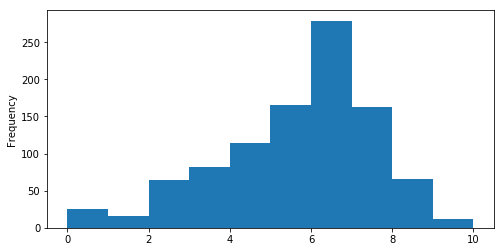

In [391]:
clean_08['greenhouse_gas_score'].plot(kind='hist',figsize=(8,4));

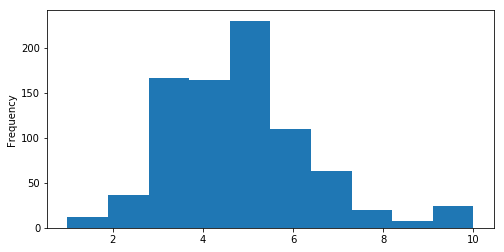

In [392]:
clean_18['greenhouse_gas_score'].plot(kind='hist',figsize=(8,4));

> - From above plot the Distribution for 2008 is more skewed to the left and 2018 is more skewed to the right

### Research Question 2 : Comparing combined mpg  from 2008 to 2018?

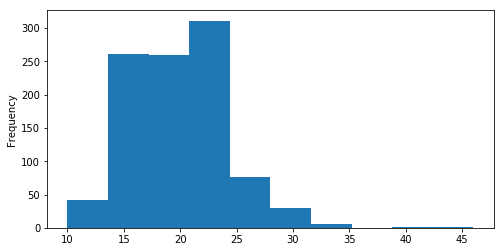

In [393]:
clean_08['cmb_mpg'].plot(kind='hist',figsize=(8,4));

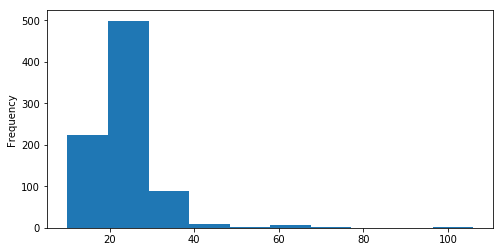

In [394]:
clean_18['cmb_mpg'].plot(kind='hist',figsize=(8,4));

> - From above plot the Distribution of combined mpg for both skewed to the right

### Research Question 3 : correlation between displacement and combined mpg.

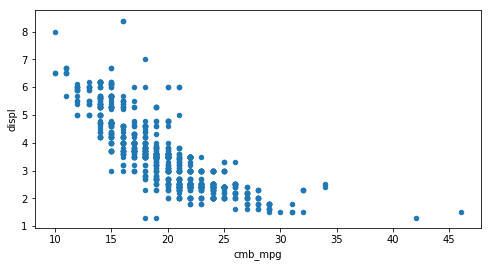

In [404]:
clean_08.plot(x='cmb_mpg',y='displ',kind='scatter',figsize=(8,4));

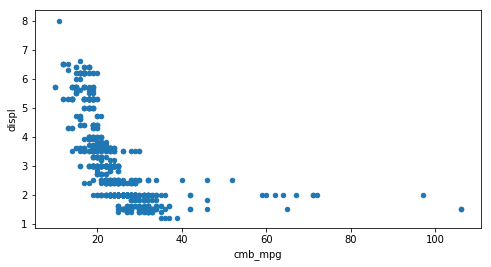

In [405]:
clean_18.plot(x='cmb_mpg',y='displ',kind='scatter',figsize=(8,4));

> - The plot clearly shows that there is `negative correlation` between displacement and combined mpg

### Research Question 4 : correlation between greenhouse gas score and combined mpg.

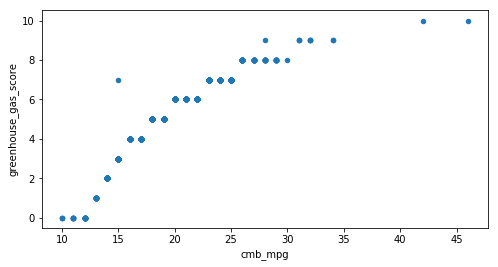

In [402]:
clean_08.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter',figsize=(8,4));

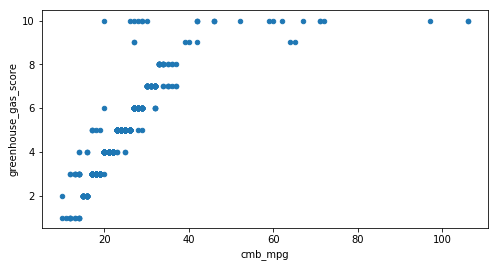

In [403]:
clean_18.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter',figsize=(8,4));

> - The plot clearly shows that there is `positive correlation` between greenhouse gas score and combined mpg.

### Research Question 5 :  Are more unique models using alternative sources of fuel? By how much?

In [410]:
display(Markdown('***2008 dataset***'))
display(clean_08['fuel'].value_counts())
display(Markdown('***2018 dataset***'))
display(clean_18['fuel'].value_counts())

***2008 dataset***

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

***2018 dataset***

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 

In [417]:
# how many unique models used alternative sources of fuel in 2008
alt_08=clean_08.query('fuel in ["CNG","ethanol"]')['model'].nunique()
alt_08

2

In [418]:
# how many unique models used alternative sources of fuel in 2018
alt_18=clean_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

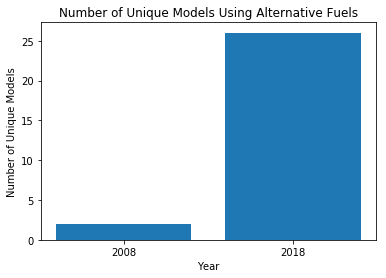

In [419]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [422]:
# total unique models each year
total_08 = clean_08.model.nunique()
total_18 = clean_18.model.nunique()
total_08, total_18

(377, 357)

In [423]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

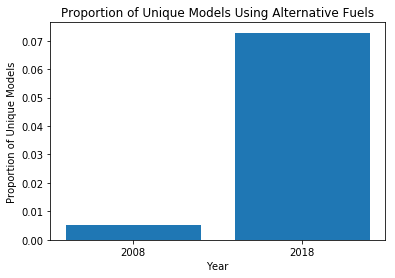

In [424]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Research Question 6 : How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [425]:
veh_08 = clean_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [426]:
veh_18 = clean_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [427]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

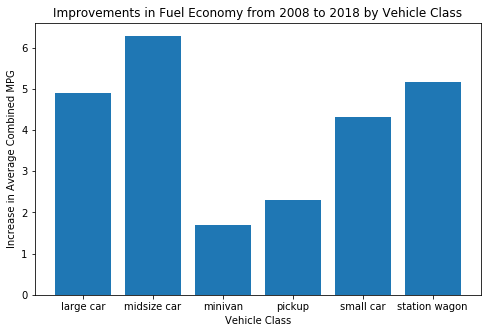

In [428]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Research Question 7 : For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [429]:
#first we need to combine the dataset with inner keyword
clean_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [430]:
clean_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


In [456]:
clean_08.columns[:10]

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg'],
      dtype='object')

In [457]:
#rename the column in clean_08 dataset
clean_08.rename(columns=lambda x:x[:10]+"_2008",inplace=True)
clean_08.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [459]:
combined_data=pd.merge(clean_08,clean_18,how='inner',left_on='model_2008',right_on='model')
combined_data.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008',
       'model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [460]:
combined_data.to_csv('combined_data.csv',index=False)

In [462]:
merged_data=pd.read_csv('combined_data.csv')
merged_data.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


In [466]:
model_mpg=merged_data.groupby('model').mean()[['cmb_mpg','cmb_mpg_2008']]
model_mpg.head()

,cmb_mpg,cmb_mpg_2008
model,,
ACURA RDX,22.500000,19.000000
AUDI A3,28.000000,23.333333
AUDI A4,27.000000,21.000000
AUDI A6,25.666667,19.666667
AUDI A8 L,22.000000,16.500000


In [467]:
model_mpg['mpg_change']=model_mpg['cmb_mpg']-model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg,cmb_mpg_2008,mpg_change
model,,,
ACURA RDX,22.500000,19.000000,3.500000
AUDI A3,28.000000,23.333333,4.666667
AUDI A4,27.000000,21.000000,6.000000
AUDI A6,25.666667,19.666667,6.000000
AUDI A8 L,22.000000,16.500000,5.500000


In [477]:
model_mpg['mpg_change'].max()

In [479]:
model_mpg[model_mpg['mpg_change']== model_mpg['mpg_change'].max()]

,cmb_mpg,cmb_mpg_2008,mpg_change
model,,,
VOLVO XC 90,32.2,15.666667,16.533333


In [480]:
model_mpg['mpg_change'].idxmax()

'VOLVO XC 90'

In [481]:
model_mpg.loc[model_mpg['mpg_change'].idxmax()]

cmb_mpg         32.200000
cmb_mpg_2008    15.666667
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!